In [4]:
%%file OptionPort_Greeks.m
%Option Portfolio Greeks

function Port_Greeks = OptionPort_Greeks(S, r, q, POS)
    %Option Portfolio Data
    LS      = POS(:, 1);         %Long/Short
    C_P     = POS(:, 2);         %Call/Put
    NC      = POS(:, 3);         %# of Contracts
    M       = POS(:, 4);         %Multiplier
    X       = POS(:, 5);         %Strike
    T       = POS(:, 6);         %Time to Maturity
    Imp_Vol = POS(:, 7);         %Implied Volatility
    
    %Option Portfolio Greeks
    sz    = size(POS);
    Delta = zeros(sz(1), 1);
    Gamma = zeros(sz(1), 1);
    Vega  = zeros(sz(1), 1);
    Theta = zeros(sz(1), 1);
    Rho   = zeros(sz(1), 1);
    
    for i=1:sz(1)
        Delta(i) = LS(i) * NC(i) * M(i) * BS(C_P(i), 2, S, X(i), r, T(i), Imp_Vol(i), q);
        Gamma(i) = LS(i) * NC(i) * M(i) * BS(C_P(i), 3, S, X(i), r, T(i), Imp_Vol(i), q);
        Vega(i)  = LS(i) * NC(i) * M(i) * BS(C_P(i), 4, S, X(i), r, T(i), Imp_Vol(i), q);
        Theta(i) = LS(i) * NC(i) * M(i) * BS(C_P(i), 5, S, X(i), r, T(i), Imp_Vol(i), q);
        Rho(i)   = LS(i) * NC(i) * M(i) * BS(C_P(i), 6, S, X(i), r, T(i), Imp_Vol(i), q);
    end
    
    Port_Greeks = sum([Delta Gamma Vega Theta Rho]);

Created file '/Users/changsoo/Desktop/논문/Matlab/OptionPort_Greeks.m'.


In [13]:
S=100; r=0.05; HS_Vol=0.3; q=0.01; T=1;
POS = [-1 1 1 1 110 0.5 0.3 5.3845;
       -1 2 1 1 90  0.5 0.3 3.3832];

In [10]:
Port_Greeks =  OptionPort_Greeks(S, r, q, POS)


Port_Greeks =

   -0.1580   -0.0328  -49.2277   14.9620   -3.5168



In [31]:
%%file OptionPort_Simu.m
% Option Portfolio P&L Simulation Graph

function OptionPort_Simu(S, r, T, HS_Vol, q, GP, POS)
    %Option Portfolio Data
    LS      = POS(:, 1);         %Long/Short
    C_P     = POS(:, 2);         %Call/Put
    NC      = POS(:, 3);         %# of Contracts
    M       = POS(:, 4);         %Multiplier
    X       = POS(:, 5);         %Strike
    BP      = POS(:, 8);         %Option Book Price
    
    %Stock/vol/t Change, Size
    SP     = (S*0.7:S*1.3)';
    vol    = (HS_Vol*0.5:0.01:HS_Vol*1.5);
    t      = (T:-1/365:1/365)';
    SP_ns  = length(SP);
    vol_ns = length(vol);
    t_ns   = length(t);
    sz     = size(POS);

    %P&L Simulation (Stock Price & Vol)
    Price1  = zeros(SP_ns, sz(1));
    Cur_PL1 = zeros(SP_ns, vol_ns);
    for i=1:SP_ns
        for k=1:vol_ns
            for j=1:sz(1)
                Price1(i, j) = LS(j) * NC(j) * M(j) * (BS(C_P(j), 1, SP(i), X(j), r, T, vol(k), q) - BP(j));
                Cur_PL1(i, k) = sum(Price1(i,:));
            end
        end
    end
    
    %P&L Simulation(Stock Price & T)
    Price2  = zeros(SP_ns, sz(1));
    Cur_PL2 = zeros(SP_ns, t_ns);
    for i=1:SP_ns
        for k=1:t_ns
            for j=1:sz(1)
                Price2(i, j) = LS(j) * NC(j) * M(j) * (BS(C_P(j), 1, SP(i), X(j), r, T, HS_Vol, q) - BP(j));
                Cur_PL2(i, k) = sum(Price2(i,:));
            end
        end
    end
    
    if GP==1
        figure(2)
        %P&L Simulation(Stock Price & Maturity) Graph
        subplot(2, 1, 2)
        [SP1, t] = meshgrid(SP, t);
        mesh(SP1, t, Cur_PL2')
        xlabel('Stock Price')
        ylabel('Time to Maturity')
        zlabel('Portfolio P&L')
        title('P&L Simulation(Stock Price & Maturity)')
        
        %P&L Simulation(Stock Price & Vol) Graph
        subplot(2, 1, 1)
        [SP2, vol] = meshgrid(SP, vol);
        mesh(SP2, vol, Cur_PL1')
        xlabel('Stock Price')
        ylabel('Volatility')
        zlabel('Portfolio P&L')
        title('P&L Simulation(Stock Price & Vol)')    
    end

Created file '/Users/changsoo/Desktop/논문/Matlab/OptionPort_Simu.m'.


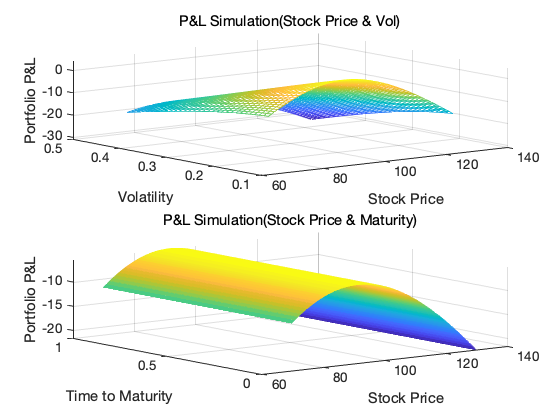

In [35]:
OptionPort_Simu(S, r, T, HS_Vol, q, 1, POS)

In [48]:
%%file OptionPort_GP.m
%Option Portfolio Payoff & Greeks Graph

function OptionPort_GP(S, r, q, GP, POS)
    %Option Portfolio Data
    LS      = POS(:, 1);         %Long/Short
    C_P     = POS(:, 2);         %Call/Put
    NC      = POS(:, 3);         %# of Contracts
    M       = POS(:, 4);         %Multiplier
    X       = POS(:, 5);         %Strike
    T       = POS(:, 6);         %Time to Maturity
    Imp_Vol = POS(:, 7);         %Implied Volatility
    BP      = POS(:, 8);         %Option Book Price
    
    %Size
    SP = (S*0.7:S*1.3)';
    ns = length(SP);
    sz = size(POS);
    
    %Portfolio Greeks
    Price  = zeros(ns, sz(1));
    Delta  = zeros(ns, sz(1));
    Gamma  = zeros(ns, sz(1));
    Vega   = zeros(ns, sz(1));
    Theta  = zeros(ns, sz(1));
    Rho    = zeros(ns, sz(1));
    
    for i=1:ns
        for j=1:sz(1)
            Price(i, j) = LS(j) * NC(j) * M(j) * BS(C_P(j), 1, SP(i), X(j), r, T(j), Imp_Vol(j), q);
            Delta(i, j) = LS(j) * NC(j) * M(j) * BS(C_P(j), 2, SP(i), X(j), r, T(j), Imp_Vol(j), q);
            Gamma(i, j) = LS(j) * NC(j) * M(j) * BS(C_P(j), 3, SP(i), X(j), r, T(j), Imp_Vol(j), q);
            Vega(i, j)  = LS(j) * NC(j) * M(j) * BS(C_P(j), 4, SP(i), X(j), r, T(j), Imp_Vol(j), q);
            Theta(i, j) = LS(j) * NC(j) * M(j) * BS(C_P(j), 5, SP(i), X(j), r, T(j), Imp_Vol(j), q);
            Rho(i, j)   = LS(j) * NC(j) * M(j) * BS(C_P(j), 6, SP(i), X(j), r, T(j), Imp_Vol(j), q);
        end
    end
    
    Port_Delta = sum(Delta, 2);
    Port_Gamma = sum(Gamma, 2);
    Port_Vega  = sum(Vega, 2);
    Port_Theta = sum(Theta, 2);
    Port_Rho   = sum(Rho, 2);
    
    %Portfolio Maturity P&L
    Mat_PL = zeros(ns, sz(1));
    for i=1:ns
        for j=1:sz(1)
            if C_P(j) == 1
                Mat_PL(i, j) = LS(j) * NC(j) *M(j) * (max(SP(i) - X(j), 0) + -BP(j));
            elseif C_P(j) ==2
                Mat_PL(i, j) = LS(j) * NC(j) *M(j) * (max(X(j) - SP(i), 0) + -BP(j));
            end
        end
    end
    
    Port_Mat_PL = sum(Mat_PL, 2);
    
    %Portfolio Current P&L
    Cur_PL = zeros(ns, sz(1));
    for i=1:ns
        for j=1:sz(1)
            Cur_PL(i, j) = Price(i, j) - LS(j) * NC(j) * M(j) * BP(j);
        end
    end
    
    Port_Cur_PL = sum(Cur_PL, 2);
    
    %Graph
    if GP == 1
        figure(1)
        subplot(3, 2, 1)
        plot(SP, Port_Mat_PL, SP, Port_Cur_PL, SP, 0, S, Port_Mat_PL)
        title('     Maturity & Current Payoff')
        subplot(3, 2, 3)
        plot(SP, Port_Delta, SP, 0, S, Port_Delta)
        title('Delta')
        subplot(3, 2, 5)
        plot(SP, Port_Gamma, SP, 0, S, Port_Gamma)
        title('Gamma')
        subplot(3, 2, 2)
        plot(SP, Port_Vega, SP, 0, S, Port_Vega)
        title('Vega')
        subplot(3, 2, 4)
        plot(SP, Port_Theta, SP, 0, S, Port_Theta)
        title('Theta')
        subplot(3, 2, 6)
        plot(SP, Port_Rho, SP, 0, S, Port_Rho)
        title('Rho')
    end
    

Created file '/Users/changsoo/Desktop/논문/Matlab/OptionPort_GP.m'.


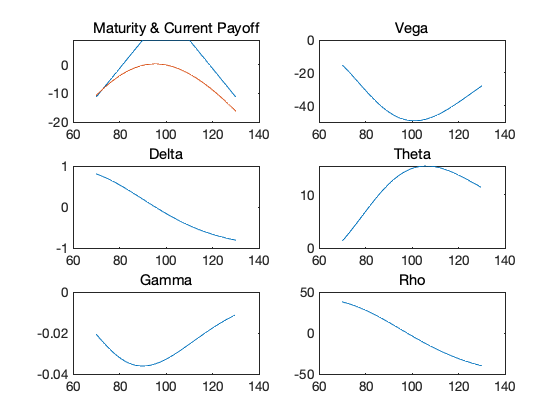

In [50]:
OptionPort_GP(S, r, q, 1, POS)